<h1> <b> Análise de Fraude Financeira </b> </h1>

<h2> Empresa Blocker Fraud Company </h2> 

Empresa especializada na detecção de fraudes em transações financeiras feitas através de dispositivos móveis. A empresa tem um serviço chamado “Blocker Fraud” no qual garante o bloqueio de transações fraudulentas.

E o modelo de negócio da empresa é do tipo Serviço com a monetização feita por performance do serviço prestado, ou seja, o usuário paga uma taxa fixa sobre o sucesso na detecção de fraude das transações do cliente.

Porém, a Blocker Fraud Company está em fase de expansão no Brasil e para adquirir clientes mais rapidamente, ela adotou uma estratégia muito agressiva. A estratégia funciona da seguinte forma:

- A empresa vai receber 25% do valor de cada transação detectada verdadeiramente como fraude.
- A empresa vai receber 5% do valor de cada transação detectada como fraude, porém a transação é verdadeiramente legítima.
- A empresa vai devolver 100% do valor para o cliente, a cada transação detectada como legítima, porém a transação é verdadeiramente uma fraude.

Com essa estratégia agressiva a empresa assume os riscos em falhar na detecção de fraude e é remunerada na detecção assertiva das fraudes.

Para o cliente, é um excelente negócio contratar a Blocker Fraud Company. Apesar da taxa cobrada ser muito alta sobre o sucesso, 25%, a empresa reduz seus custos com transações fraudulentas detectadas corretamente e ainda o prejuízo causado por um erro do serviço de anti-fraude será coberto pela própria Blocker Fraud Company.

Para a empresa, além de conseguir muitos clientes com essa estratégia arriscada em garantir o reembolso no caso de uma falha na detecção de fraude do cliente, ela depende somente da precisão e da acurácia dos modelos construídos pelos seus Cientistas de Dados, ou seja, quanto mais preciso for o modelo “Blocker Fraud”, maior o faturamento da empresa. Porém, se o modelo tiver baixa precisão, a empresa poderá ter um prejuízo enorme.

## O Desafio
Você foi contratado como um Consultor de Ciência de Dados para criar um modelo de alta precisão e acurácia na detecção de fraudes de transações feitas através de dispositivos móveis.

Ao final da sua consultoria, você precisa entregar ao CEO da Blocker Fraud Company um modelo em produção no qual seu acesso será feito via API, ou seja, os clientes enviarão suas transações via API para que o seu modelo as classifique como fraudulentas ou legítimas.

Além disso, você precisará entregar um relatório reportando a performance e os resultados do seu modelo em relação ao lucro e prejuízo que a empresa terá ao usar o modelo que você produziu. No seu relatório deve conter as respostas para as seguintes perguntas:

- Qual a Precisão e Acurácia do modelo?
- Qual a Confiabilidade do modelo em classificar as transações como legítimas ou fraudulentas?
- Qual o Faturamento Esperado pela Empresa se classificarmos 100% das transações com o modelo?
- Qual o Prejuízo Esperado pela Empresa em caso de falha do modelo?
- Qual o Lucro Esperado pela Blocker Fraud Company ao utilizar o modelo?

## Os Dados do desafio
O conjunto de dados que será utilizado para criar a solução para a Blocker Fraud Company, está disponível na plataforma do Kaggle.

Esse é o link: [Synthetic Financial Datasets For Fraud Detection](https://www.kaggle.com/ntnu-testimon/paysim1)

In [1]:
# Importar os pacotes necessários

# pandas para manipulação dos dados
import pandas as pd

# matplotlib para nossos gráficos
import matplotlib.pyplot as plt

# seaborn para uma melhor visualização dos gráficos
import seaborn as sns

# numpy para manipulações matemáticas 
import numpy as np

<h2> Importando os dados </h2>

Os dados podem ser obtidos pelo meio deste endereço [Link](https://www.kaggle.com/ntnu-testimon/paysim1). Consiste basicamente em um arquivo csv contendo 6.
362.620 entradas e 11 colunas.<br>

### Descrição das Colunas 

- `step` <br>
Tipo - Numerica <br>
Mapeia uma unidade de tempo no mundo real. Neste caso, 1 etapa equivale a 1 hora.<br>

- `type` <br>
Tipo - Caracter<br>
Valores - CASH-IN, CASH-OUT, DEBIT, PAYMENT e TRANSFER<br>

- `amount`<br>
Tipo - numeric<br>
Valor da transação na moeda local<br>

- `nameOrig`<br>
Tipo - caracter<br>
Cliente que iniciou a transação<br>

- `oldbalanceOrg`<br>
Tipo - numerico<br>
Saldo inicial antes da transação<br>

- `newbalanceOrig`<br>
Tipo - numerico<br>
Saldo do cliente após a transação.<br>

- `nameDest`<br>
Tipo -caracter<br>
ID do destinatário da transação.<br>

- `oldbalanceDest`<br>
Tipo -numerico<br>
Saldo inicial do destinatário antes da transação.<br>

- `newbalanceDest`<br>
Tipo - numerico<br>
Saldo do destinatário após a transação.<br>

- `isFraud`<br>
Tipo - numerico<br>
Identifica uma transação fraudulenta (1) e não fraudulenta (0)<br>

- `isFlaggedFraud` <br>
Tipo - Numerico<br>
O modelo de negócios visa controlar as transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.


In [2]:
df = pd.read_csv('/PS_20174392719_1491204439457_log.csv')

In [3]:
# Dimensões do df
print("Dimensões do DataFrame:")
print("Linhas:\t\t{}".format(df.shape[0]))
print("Colunas:\t{}".format(df.shape[1]))

Dimensões do DataFrame:
Linhas:		6362620
Colunas:	11


In [4]:
# Visualizando as primeiras linhas
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# ver resumo estatístico do dados numéricos
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
# tipo das variáveis
print("\nTipos das Variáveis:")
print(df.dtypes)


Tipos das Variáveis:
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


### Temos
- 3 variáveis não numéricas 
- 8 do tipo numérico

In [7]:
# Valores Ausentes
print("\nValores Ausentes:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


Valores Ausentes:
isFlaggedFraud    0.0
isFraud           0.0
newbalanceDest    0.0
oldbalanceDest    0.0
nameDest          0.0
newbalanceOrig    0.0
oldbalanceOrg     0.0
nameOrig          0.0
amount            0.0
type              0.0
step              0.0
dtype: float64


- Não temos valores nulos

Uma outra análise interessante de se fazer diz respeito à contagem de valores únicos por features. Muitas vezes, variáveis numéricas podem esconder classes/categorias que melhor representariam uma feature, ou revelar uma quantidade elevada de classes para "variáveis categóricas".

In [8]:
# Valores Únicos
print("\nValores Únicos:")
print(df.nunique().sort_values())


Valores Únicos:
isFraud                 2
isFlaggedFraud          2
type                    5
step                  743
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
newbalanceDest    3555499
oldbalanceDest    3614697
amount            5316900
nameOrig          6353307
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


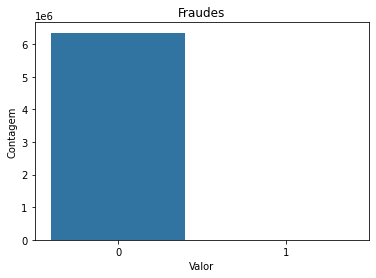

Proporção de Fraudes no Dataset:
0    99.870918
1     0.129082
Name: isFraud, dtype: float64


In [9]:
# Proporção entre Inadimplentes no Dataset
fig, ax = plt.subplots()
sns.countplot('isFraud', data=df, ax=ax)
ax.set_title("Fraudes")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")
plt.show();

print("Proporção de Fraudes no Dataset:")
print((df['isFraud'].value_counts() / df.shape[0] )*100)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


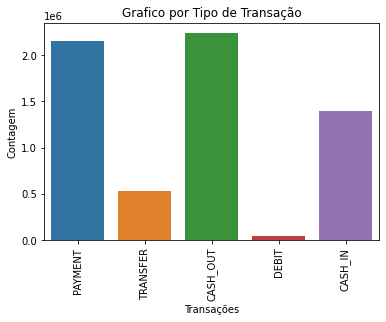

Proporção para os tipos de transação no Dataset:
CASH_OUT    35.166331
PAYMENT     33.814608
CASH_IN     21.992261
TRANSFER     8.375622
DEBIT        0.651178
Name: type, dtype: float64


In [10]:
# Proporcao para os tipos de transacao
fig, ax = plt.subplots()
sns.countplot('type', data=df, ax=ax)
ax.set_title("Grafico por Tipo de Transação")
ax.set_xlabel("Transações")
ax.set_ylabel("Contagem")
#plt.plot(df['score_1'])
plt.xticks(rotation=90)
plt.show();

print("Proporção para os tipos de transação no Dataset:")
print((df['type'].value_counts() / df.shape[0] )*100)

In [11]:
# Analisar a probabilidade de tipos de transação por fraude
df[['type', 'isFraud']].groupby(['type']).mean()

,isFraud
type,
CASH_IN,0.000000
CASH_OUT,0.001840
DEBIT,0.000000
PAYMENT,0.000000
TRANSFER,0.007688


## Preparação dos dados

Conforme nossas informações vamos fazer algumas limpezas. Excluir as colunas nameOrig e nameDest, pois se referem aos nomes dos clientes que não interferem no resultado da fraude.

In [12]:
# Vamos fazer uma cópia do nosso dataset
df_clean = df.copy()

In [13]:
# Vamos excluir as colunas
# nameOrig
# nameDest
df_clean.drop(labels=['nameOrig', 'nameDest'], axis=1, inplace=True)

In [14]:
# converter 'type' em 0 , 1 , 2 , 3 , 4
df_clean['type'] = df_clean['type'].map({'CASH_OUT': 0, 'PAYMENT': 1, 'CASH_IN': 2, 'TRANSFER':3, 'DEBIT':4})

In [15]:
df_clean.head(20)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,1,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,3,181.00,181.00,0.00,0.0,0.00,1,0
3,1,0,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,1,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,1,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,1,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,1,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,1,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,4,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


Para melhorar o desempenho do modelo, vamos normalizar as variáveis numéricas usando `StandardScaler`.

In [16]:
# importando a biblioteca para normalizar nossos dados
from sklearn.preprocessing import StandardScaler

In [17]:
# fazendo uma copia do nosso dataset já limpo
scaled_df = df_clean.copy()

In [18]:
# selecionando as colunas para normalizar
num_cols = scaled_df.drop(labels=['isFraud', 'isFlaggedFraud'] ,
                         axis=1).select_dtypes(exclude='object').columns

In [21]:
# normalizando as colunas numéricas
scaled_df[num_cols] = StandardScaler().fit_transform(scaled_df[num_cols].values)

In [22]:
# verificando nossos dados
scaled_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-1.703042,-0.056384,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0
1,-1.703042,-0.056384,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0
2,-1.703042,1.982567,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0
3,-1.703042,-1.075860,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0
4,-1.703042,-0.056384,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0


## Balanceando nossos dados

### Métodos para lidar com datasets 

Há diversas maneiras para atacar o problema de dados desbalanceados, que envolvem desde a construção de algoritmos específicos até a aplicação de algoritmos mais avançados como Recognition-based Learning e Cost-sensitive Learning.

No entanto, uma outra abordagem bem mais simples tem sido amplamente usada (com ótimos resultados), a abordagem sampling.

figura

<i>Sampling</i> é um pré-processamento que visa minimizar as discrepâncias entre as classes por meio de uma reamostragem. Para gerar um conjunto balanceado, são usadas normalmente as seguintes técnicas:

- <b>Over-sampling</b>: cria novas observações da classe minoritária a partir das informações contidas nos dados originais. Essa geração de novas entradas pode ser feita aleatoriamente com o auxílio de técnicas de clustering ou sinteticamente.
- <b>Under-sampling</b>: reduz o desbalanceamento do dataset focando na classe majoritária. Ou seja, elimina aleatoriamente entradas da classe com maior número de ocorrências.


### Vantagens e desvantagens de cada técnica

Não existem uma solução perfeita e única, apenas com vantagens. Cada escolha uma renúncia, isso é <i>Data Science</i>. Quando você opta por uma abordagem, tem que estar ciente das limitações e implicações nos seus resultados – e transmitir isso para os <i>stakeholders</i>.

O <i><b>Over-sampling</b></i> replica os dados já existentes, aumentando o número de instâncias das classes minoritárias. A vantagem é que nenhuma informação é descartada, porém o custo computacional será elevado e você irá deteriorar a performance do algoritmo para as classes minoritárias.

Já o <i><b>Under-sampling</b></i> vai extrair um subconjunto aleatório da classe majoritária, preservando as características da classe minoritária, sendo ideal para situações onde você tem grandes volumes de dados. Apesar de reduzir o tempo computacional e de armazenamento, esta técnica descarta informações da classe majoritária, o que pode levar a uma performance inferior nas predições dela.

In [23]:
!pip install -q scikit-plot
import scikitplot as skplt

In [24]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


0    6354407
1       8213
Name: isFraud, dtype: int64

Fraudes representam 0.1291% do dataset.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


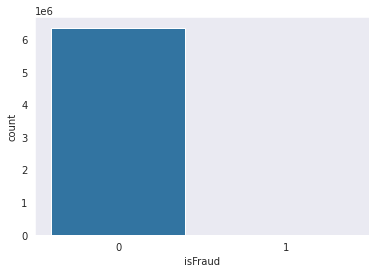

In [25]:
# ver o balanceamento das classes
print(df.isFraud.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.isFraud == 1].shape[0] / df.shape[0]) * 100))
 
# plotar gráfico de barras para as Classes
sns.countplot('isFraud', data=df);

### Separando nossos dados em teste e treino


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9992    0.9999    0.9996   1588602
           1     0.9068    0.4170    0.5712      2053

    accuracy                         0.9992   1590655
   macro avg     0.9530    0.7084    0.7854   1590655
weighted avg     0.9991    0.9992    0.9990   1590655

Acurácia: 0.9992

AUC: 0.7084



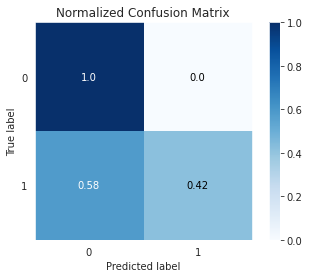

In [26]:
# separar variáveis entre X e y
X = scaled_df.drop('isFraud', axis=1)
y = scaled_df['isFraud']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

## Balanceando nossos dados com a técnica Under-Sampling

1    6160
0    6160
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


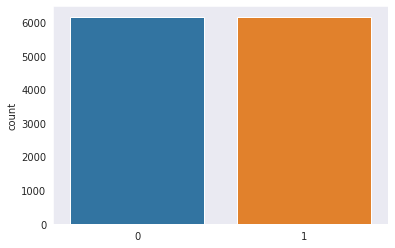

In [27]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_res);

## Aplicando novamente o modelo de Regressão Logística para os dados balanceados

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9709    0.9851   1588602
           1     0.0349    0.8149    0.0669      2053

    accuracy                         0.9707   1590655
   macro avg     0.5173    0.8929    0.5260   1590655
weighted avg     0.9985    0.9707    0.9839   1590655

Acurácia: 0.9707

AUC: 0.8929



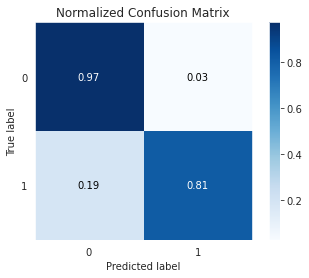

In [28]:
# instanciar e treinar um modelo de Regressão Logística
model_res = LogisticRegression()
model_res.fit(X_res, y_res)

# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(X_test)
y_proba_res = model_res.predict_proba(X_test)

# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_res)))